#              Email Spam Classifier Using Machine Learning

Workflow :

1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement

In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\mail_data.csv")

In [9]:
df.sample(5)

,Category,Message
2627,ham,Unni thank you dear for the recharge..Rakhesh
3074,ham,Somebody should go to andros and steal ice
4755,ham,Ok lor... Or u wan me go look 4 u?
811,ham,S:)s.nervous &lt;#&gt; :)
497,ham,Nope... Think i will go for it on monday... So...


In [10]:
df.shape

(5572, 2)

# 1. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
# renaming the cols
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
2853,ham,how tall are you princess?
774,ham,I wil be there with in &lt;#&gt; minutes. Go...
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!
3780,spam,"Claim a 200 shopping spree, just call 08717895..."
5219,ham,Pls she needs to dat slowly or she will vomit ...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()   

In [16]:
encoder.fit_transform(df['target'])     #Label Encoding refers to converting the labels 
#into a numeric form so as to convert them into the machine-readable form.

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicate values
df.duplicated().sum()

415

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5157, 2)

# 2.EDA


In [24]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

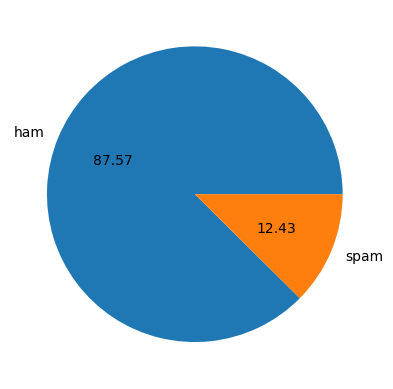

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")  #autopct tells percentage,%0.2f tells values upto 2 decimal points
plt.show()

Data is imbalanced

Now analysis we need to perform how many alphabets, words and sentences are used in email.

We make 3 columns : no of characters, words and sentences in email.For that we use nltk library.

In [62]:
!pip install nltk

In [63]:
import nltk

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
df['text'].apply(len) #tells no of char in each mail.


0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: text, Length: 5157, dtype: int64

In [66]:
df['num_characters'] = df['text'].apply(len)

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [68]:
# num of words

df['text'].apply(lambda x:(nltk.word_tokenize(x))) # nltk.word_tokenize breaks email on basis of words.

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5157, dtype: object

In [69]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  # len counts no of words in a list

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
#no of sentences

df['text'].apply(lambda x:(nltk.sent_tokenize(x)))   #nltk.sent_tokenize breaks email into several sentences

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5157, dtype: object

In [72]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [74]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [75]:
# ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [76]:
#spam

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [77]:
import seaborn as sns



<AxesSubplot:xlabel='num_characters', ylabel='Count'>

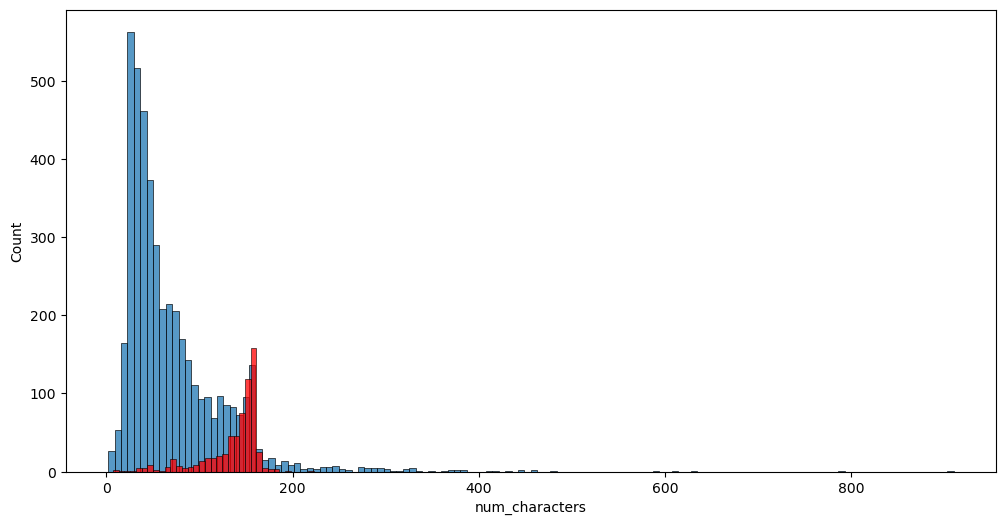

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

#shows avg no of character used in ham is less than spam

<AxesSubplot:xlabel='num_words', ylabel='Count'>

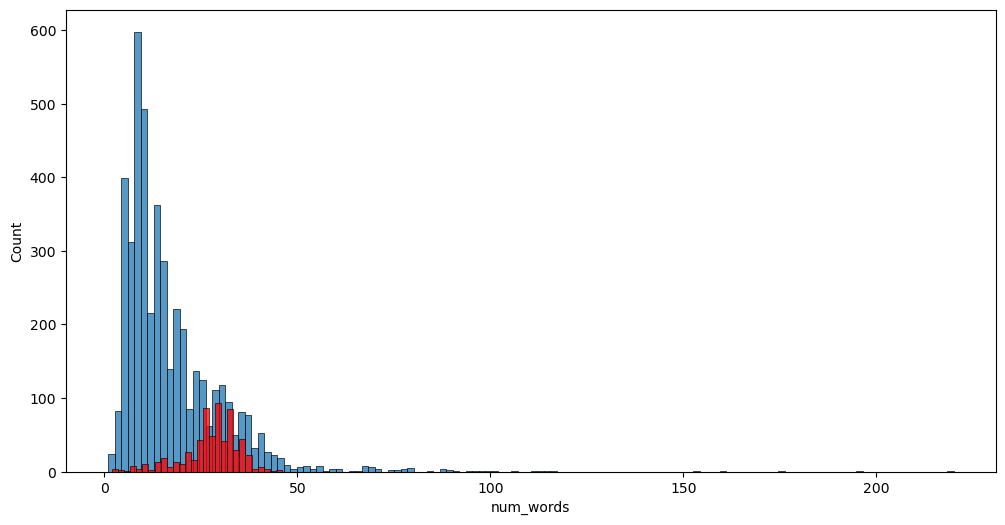

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

#shows avg no of words used in ham is less than spam.

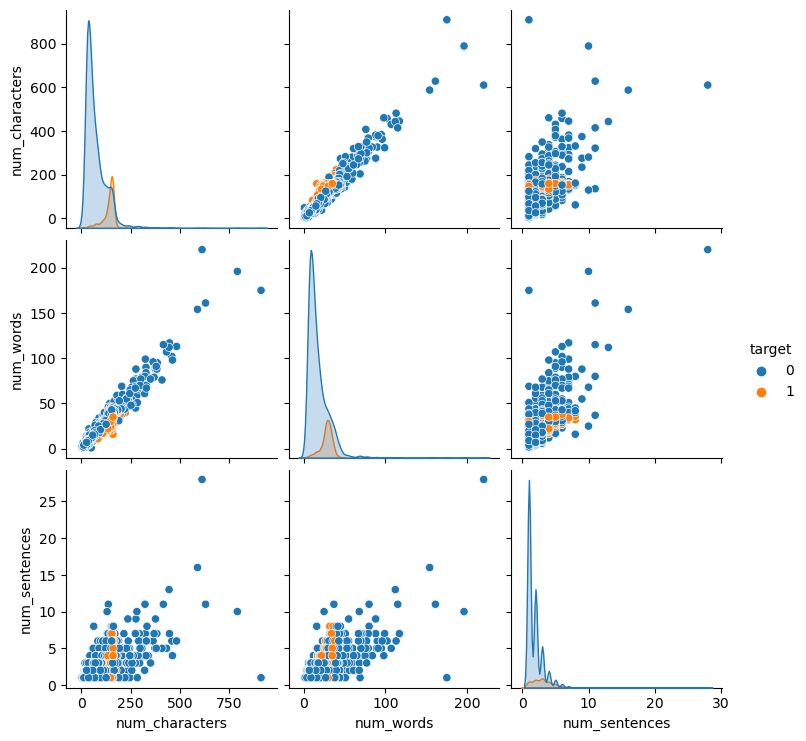

In [80]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

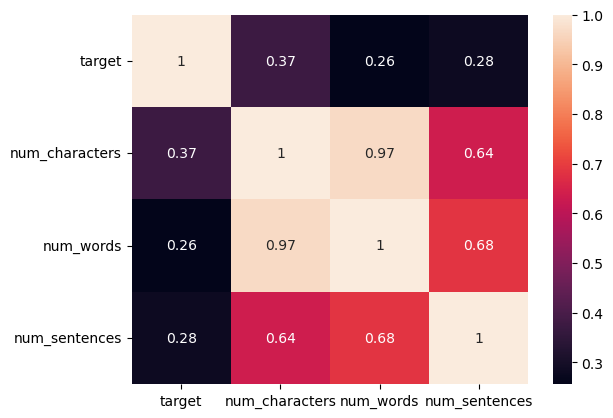

In [81]:
sns.heatmap(df.corr(),annot=True)

We'll take target vs no. of char correlation because it is the highest among all (target vs others)

# 3. Data/Text Preprocessing

1.Lower case
2.Tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.Stemming

In [86]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [88]:
import string
#string.punctuation

In [91]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()   
#ps.stem('loving')

'love'

In [92]:
def transform_text(text):
    text = text.lower()    # 1.text converted to lowercase
    text = nltk.word_tokenize(text)    #2. converted to list of words by breaking
    
    y = []
    for i in text:
        if i.isalnum():  # checking if alphanumeric present or not
            y.append(i)
    
    text = y[:] 
    y.clear()     #3. Special characters removed.
    
    for i in text:                             
        if i not in stopwords.words('english') and i not in string.punctuation:     #4.Removing stop words and punctuation
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  #4. stem brings the words in root form
    
            
    return " ".join(y)

In [93]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [95]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5157, dtype: object

In [96]:
df['transformed_text'] = df['text'].apply(transform_text)


In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [99]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.8 MB/s eta 0:00:00


In [101]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [102]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


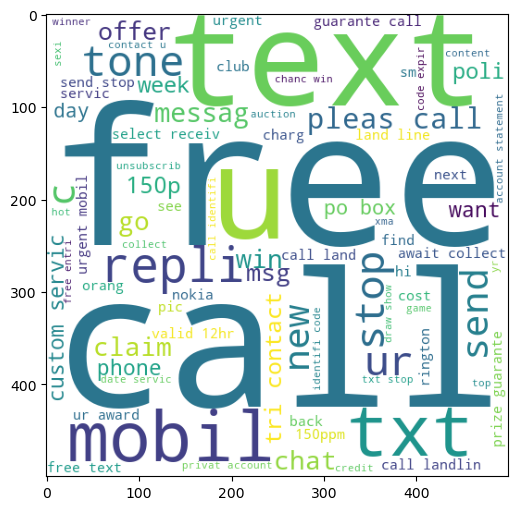

In [104]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)   #imshow used for wc

In [105]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

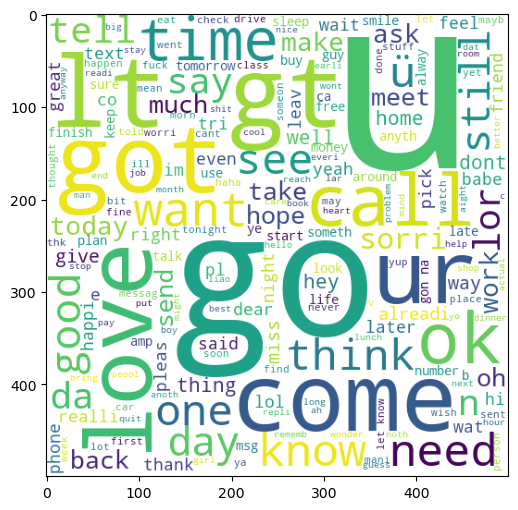

In [106]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [107]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now, checking top 30 words which are most frequent used in spam and ham :

In [110]:
df[df['target'] == 1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 641, dtype: object

In [111]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():  
    for word in msg.split():
        spam_corpus.append(word)
        

In [113]:
len(spam_corpus)

9781

In [114]:
from collections import Counter      # it is library which converts the words in dictionary with their frequency

In [119]:
Counter(spam_corpus).most_common(30)    #most occuring 30 words

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [121]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


In [126]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0         call
1         free
2            2
3          txt
4         text
5           ur
6            u
7        mobil
8         stop
9        repli
10       claim
11           4
12       prize
13         get
14         new
15      servic
16        send
17        tone
18      urgent
19       award
20       nokia
21     contact
22       phone
23        cash
24       pleas
25        week
26         win
27         min
28           c
29    guarante
Name: 0, dtype: object

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


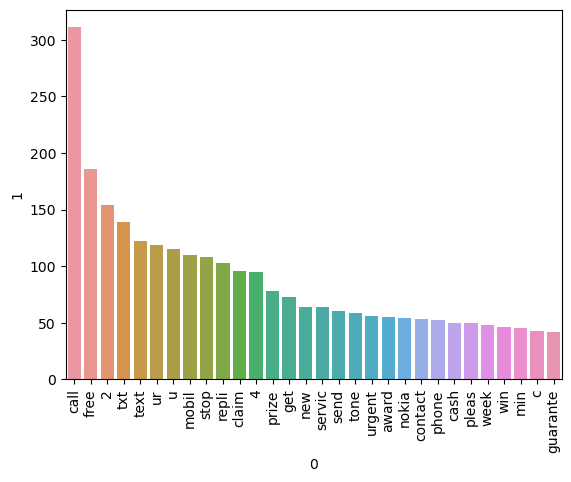

In [125]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [127]:
#for ham top 30 words:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [128]:
len(ham_corpus)


35930

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


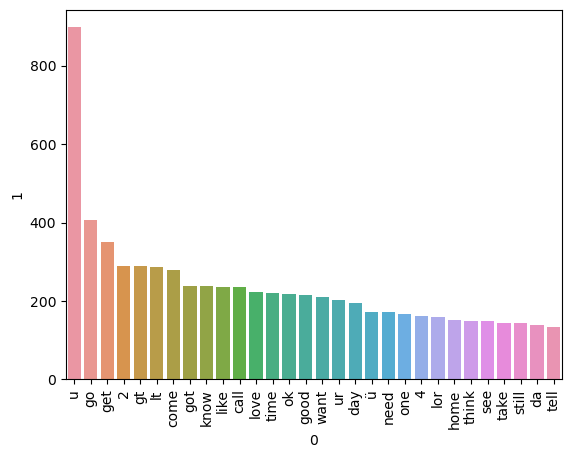

In [129]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [130]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

Generally Navie Bayes perform better with textual data. But we'll use other algorithm also.


For any algorithm input should be in numerical form. Here target in numeric form but input(transformed_text) in textual form, so we'll convert  them into numeric/vectors form, known as vectorization. 3 ways to do: 1) Bag of words 2)tfidf 3)word to word

In [133]:
# Text Vectorization
# using tifdf

In [153]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [154]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [155]:
X.shape

(5157, 6781)

In [156]:
y = df['target'].values

In [157]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [160]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [161]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [162]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8682170542635659
[[786 119]
 [ 17 110]]
0.48034934497816595


In [163]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [164]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))                  #has best accuracy andd best precision

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [165]:
#We chose tfidf --> MNB  we chose precision over accuracy because imbalance data


In [167]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 6.1 MB/s eta 0:00:00


In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [169]:
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [170]:
clfs = {
    
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc,
    'xgb':xgb
}

In [171]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [172]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  NB
Accuracy -  0.9612403100775194
Precision -  1.0
For  DT
Accuracy -  0.935077519379845
Precision -  0.8191489361702128
For  LR
Accuracy -  0.9515503875968992
Precision -  0.9230769230769231
For  RF
Accuracy -  0.9651162790697675
Precision -  1.0
For  xgb
Accuracy -  0.9709302325581395
Precision -  0.9619047619047619


In [173]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [174]:
performance_df

,Algorithm,Accuracy,Precision
0,NB,0.961240,1.000000
3,RF,0.965116,1.000000
4,xgb,0.970930,0.961905
2,LR,0.951550,0.923077
1,DT,0.935078,0.819149


In [176]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [177]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.961240
1,RF,Accuracy,0.965116
2,xgb,Accuracy,0.970930
3,LR,Accuracy,0.951550
4,DT,Accuracy,0.935078
5,NB,Precision,1.000000
6,RF,Precision,1.000000
7,xgb,Precision,0.961905
8,LR,Precision,0.923077
9,DT,Precision,0.819149


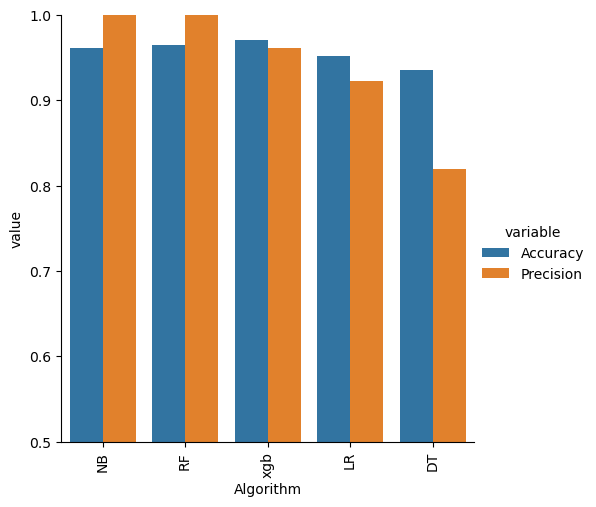

In [178]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()